# 根据fake_tweets产生的数据文件进行分析

In [1]:
from my_weapon import *
from collections import defaultdict, Counter
from IPython.display import display
from tqdm import tqdm_notebook as tqdm

In [2]:
%time groups_url_tweets = [json.load(open("disk/url_ts_media_{}.json".format(i))) for i in range(8)]

CPU times: user 56.5 s, sys: 11.6 s, total: 1min 8s
Wall time: 1min 42s


0 ...
1 ...
2 ...
3 ...
4 ...
5 ...
6 ...
7 ...


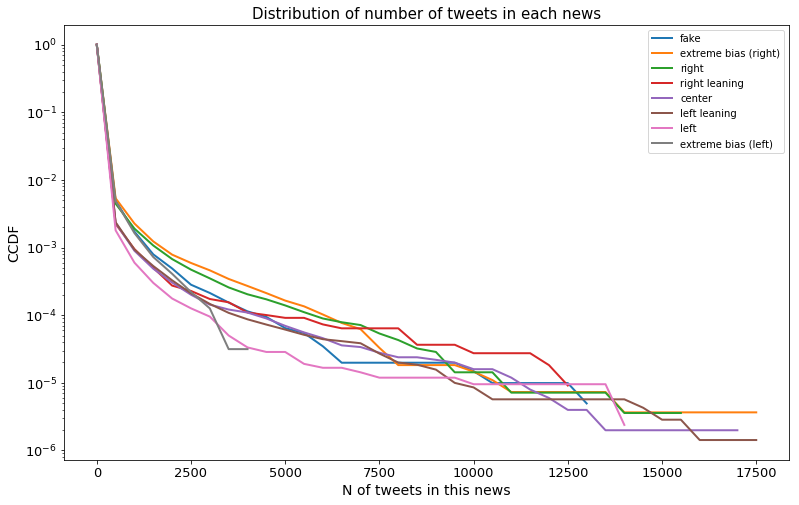

In [3]:
map_labels = {
    "0": "fake",
    "1": "extreme bias (right)",
    "2": "right",
    "3": "right leaning",
    "4": "center",
    "5": "left leaning",
    "6": "left",
    "7": "extreme bias (left)"
}

def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = np.arange(mini, maxi, step)
    # print(x, len(x))
    cdf = np.zeros(len(x))
    pdf = np.zeros(len(x))
    cnt = 0
    for d in data:
        if d < mini or d >= maxi:
            continue
            
        cnt += 1
        for i, _x in enumerate(x):
            if d >= _x:
                cdf[i] += 1
        
        for i, _x in enumerate(x):
            if i == (len(x) - 1):
                pdf[i] += 1
            elif _x <= d < x[i+1]: 
                pdf[i] += 1
                break

    # print(cdf[0], cnt, sum(pdf))
    if norm:
        cdf = cdf / cnt
        pdf = pdf / cnt
    # print(cdf)
    return x, cdf, pdf

num_of_tweets = {}
plt.figure(figsize=(13, 8))
for i in range(8):
    print(i, "...")
    url_tweets = groups_url_tweets[i]
    data = pd.Series([len(url_tweet["tweets"]) for url_tweet in url_tweets])
    num_of_tweets[map_labels[str(i)]] = data
    x, cdf, pdf = get_cdf_pdf(data, 0, 20000, 500)
    
    _zero_i = -1
    for j in range(len(cdf)):
        if cdf[j] == 0:
            _zero_i = j
            break
    x = x[:_zero_i]
    cdf = cdf[:_zero_i]
        
    plt.plot(x, cdf, label=map_labels[str(i)], lw=2)
#     data.hist(bins=50)
    
plt.title('Distribution of number of tweets in each news', fontsize=15)
plt.ylabel('CCDF', fontsize=14)
plt.xlabel('N of tweets in this news', fontsize=14)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.legend()
plt.yscale("log")
# plt.xscale("log")
#     plt.savefig('fig/distribution_size_fake_news.pdf', dpi=300)

plt.show()
plt.close()

## 针对上图的描述性统计

In [4]:
pd.DataFrame(num_of_tweets).describe()

,fake,extreme bias (right),right,right leaning,center,left leaning,left,extreme bias (left)
count,202074.000000,273890.000000,280023.000000,109641.000000,503600.000000,702822.000000,420213.000000,31798.000000
mean,16.408474,16.295761,16.255683,10.646337,13.782198,12.122836,11.282481,20.275678
std,113.583482,155.845464,133.919273,110.257874,103.808373,141.752738,78.414833,91.992912
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,4.000000,5.000000,4.000000,7.000000,5.000000,5.000000,10.000000
max,13338.000000,23882.000000,15827.000000,12582.000000,22344.000000,69052.000000,14176.000000,4056.000000


0 ...
1 ...
2 ...
3 ...
4 ...
5 ...
6 ...
7 ...


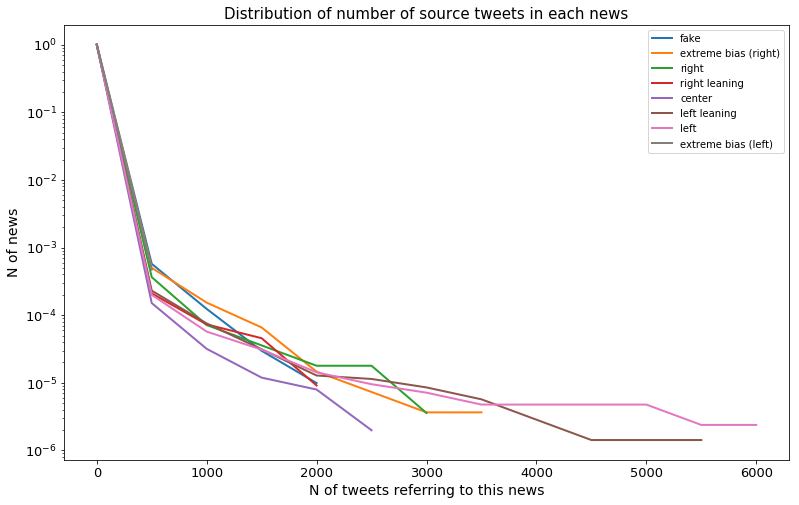

In [5]:
num_of_sources = {}
plt.figure(figsize=(13, 8))
for i in range(8):
    print(i, "...")
    url_tweets = groups_url_tweets[i]
    
    data = []
    for url_tweet in url_tweets:
        _len = len([t for t in url_tweet["tweets"] if t["is_source"]==1])
        data.append(_len)
        if _len == 0:
            print(url_tweet["URL"], len(url_tweet["tweets"]))
    data = pd.Series(data)
    num_of_sources[map_labels[str(i)]] = data
    x, cdf, pdf = get_cdf_pdf(data, 0, 10000, 500)
    
    _zero_i = -1
    for j in range(len(cdf)):
        if cdf[j] == 0:
            _zero_i = j
            break
    x = x[:_zero_i]
    cdf = cdf[:_zero_i]
        
    plt.plot(x, cdf, label=map_labels[str(i)], lw=2)
#     data.hist(bins=50)
    
plt.title('Distribution of number of source tweets in each news', fontsize=15)
plt.ylabel('N of news', fontsize=14)
plt.xlabel('N of tweets referring to this news', fontsize=14)
plt.xticks(fontsize=13); plt.yticks(fontsize=13)
plt.legend()
plt.yscale("log")
# plt.xscale("log")
# plt.savefig('fig/distribution_size_fake_news.pdf', dpi=300)

plt.show()
plt.close()

In [6]:
pd.DataFrame(num_of_sources).describe()

,fake,extreme bias (right),right,right leaning,center,left leaning,left,extreme bias (left)
count,202074.000000,273890.000000,280023.000000,109641.000000,503600.000000,702822.000000,420213.000000,31798.000000
mean,5.619704,4.635945,4.384583,3.558723,4.271910,3.550340,3.898356,5.764576
std,28.133368,29.592858,24.901905,20.337285,18.498921,22.508893,24.059844,23.348622
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2133.000000,3946.000000,3295.000000,2470.000000,2544.000000,5834.000000,6434.000000,902.000000


### 专门针对用户的分析，放到analyze_users.ipy 和 analyze_IRAs.ipynb 中～

In [7]:
import pendulum
   
def plot_day(i, url, sorted_dts, sorted_dts2=None, save=False):
    """
    包含了两条线！
    """

    plt.figure(figsize=(10, 6))
    ts = cal_ts_day(sorted_dts)
    ts.plot()
    
    if sorted_dts2:
        ts2 = cal_ts_day(sorted_dts2)
        ts2.plot()
    
    # configure
    plt.ylabel('N of tweets with this fake news', fontsize=15)
    plt.xticks(fontsize=11); plt.yticks(fontsize=11)
#     plt.xlabel('$Date$', fontsize=15)
#     plt.title(url)
    
    if save:
        plt.savefig('fig/{}-{}-overall-spread.pdf'.format(i, url), dpi=300)
    else:
        plt.show()
    
    plt.close()


def plot_48hours(i, url, sorted_dts, sorted_dts2=None, save=False):
    """
    包含了两条线！
    """
    
#     print(url)
#     print("实际传播开始和结束时间：", sorted_dts[0], sorted_dts[-1])

    plt.figure(figsize=(10, 6))
    ts = cal_ts_48hours(sorted_dts)
    ts.plot()
    
    if sorted_dts2:
        ts2 = cal_ts_48hours(sorted_dts2)
        ts2.plot()

    
    # configure
    plt.ylabel('N of tweets with this fake news', fontsize=15)
    plt.xticks(fontsize=11); plt.yticks(fontsize=11)
#     plt.xlabel('$Date$', fontsize=15)
#     plt.title(url)

    if save:
        plt.savefig('fig/{}-{}-first-48-hours.pdf'.format(i, url), dpi=300)
    else:
        plt.show()
        
    plt.close()


In [8]:
for i, url_tweet in enumerate(url_tweets):

    if i == 0:
        continue
    if i >= 3:
        break
    print("plot {} ~".format(i))
    
    url = url_tweet["url"]
    tweets_list = url_tweet["tweets"]
    dts = [t["dt"] for t in tweets_list]
    
    dts2 = [t["dt"] for t in tweets_list if t["is_source"]==1]
    plot_day(i, url, dts, dts2)
    plot_48hours(i, url, dts, dts2)

#     plot_day(i, url, dts)
#     plot_48hours(i, url, dts)

plot 1 ~


KeyError: 'url'

---

## 意见领袖定义

In [3]:
user_data = {}

x = []
y = []
for line in tqdm(open("disk/user_info.json")):
    w = line.strip().split(",")
    if int(w[2]) >= 1 and int(w[3]) >= 1:
        user_data[w[0]] = {
            "name": w[1],
            "fol": int(w[2]),
            "fri": int(w[3]),
        }

        x.append(int(w[2]))
        y.append(int(w[3]))

In [4]:
x = pd.Series(x).apply(np.log10)
y = pd.Series(y).apply(np.log10)

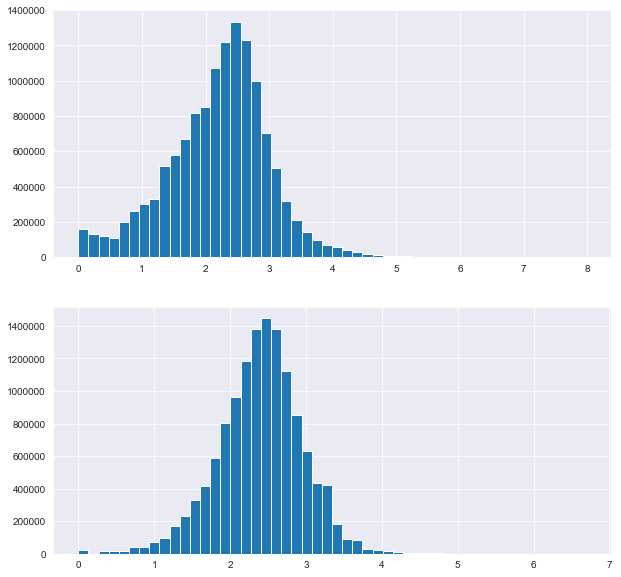

In [14]:
sns.set_style("darkgrid")
# sns.jointplot(x, y, kind="hex")
# plt.xlim(0.5, 4.5)
# plt.ylim(0.5, 4.5)
# plt.legend()

plt.figure(figsize=(10, 10))
ax = plt.subplot(211)
x.hist(bins=50)
ax = plt.subplot(212)
y.hist(bins=50)
plt.show()